<a href="https://colab.research.google.com/github/yosshi18/examen-final/blob/main/examen_final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow plotly -q

In [2]:
# Importar librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [5]:
# Visualización avanzada
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

print("📊 Librerías importadas correctamente")
print(f"🔥 TensorFlow versión: {tf.__version__}")
print(f"🐼 Pandas versión: {pd.__version__}")

📊 Librerías importadas correctamente
🔥 TensorFlow versión: 2.19.0
🐼 Pandas versión: 2.2.2


In [6]:
#aqui estaremos creando un dataset sintetico
print("🔄 Generando dataset de tendencias salariales...")

🔄 Generando dataset de tendencias salariales...


In [7]:
# Crear dataset sintético con tendencias realistas
np.random.seed(42)
years = list(range(1973, 2021))
n_years = len(years)

In [8]:
# Sectores económicos
sectors = ['Technology', 'Finance', 'Healthcare', 'Education', 'Manufacturing', 'Retail']

In [10]:
 # Generar datos sintéticos
data = []
for year in years:
    for sector in sectors:
        # Tendencia general creciente con variabilidad
        base_salary = 25000 + (year - 1973) * 800  # Crecimiento base

        # Factor sectorial
        sector_multipliers = {
            'Technology': 1.4 + (year - 1973) * 0.02,
            'Finance': 1.3 + (year - 1973) * 0.015,
            'Healthcare': 1.2 + (year - 1973) * 0.01,
            'Education': 0.9,
            'Manufacturing': 1.1 - (year - 1973) * 0.005,
            'Retail': 0.8
        }

In [12]:
#la declaracion de la celdas multifuncionales y la estadistica de los ultimos años
# Generar datos sintéticos
data = []
for year in years:
    for sector in sectors:
        # Tendencia general creciente con variabilidad
        base_salary = 25000 + (year - 1973) * 800  # Crecimiento base

        # Factor sectorial
        sector_multipliers = {
            'Technology': 1.4 + (year - 1973) * 0.02,
            'Finance': 1.3 + (year - 1973) * 0.015,
            'Healthcare': 1.2 + (year - 1973) * 0.01,
            'Education': 0.9,
            'Manufacturing': 1.1 - (year - 1973) * 0.005,
            'Retail': 0.8
        }

        # Agregar recesiones (1980, 1991, 2008) con el mandato de paul volcker
        recession_factor = 1.0
        if year in [1980, 1981, 1991, 2008, 2009]:
            recession_factor = 0.95

        salary = base_salary * sector_multipliers[sector] * recession_factor
        salary += np.random.normal(0, salary * 0.1)  # Ruido

        data.append({
            'Year': year,
            'Sector': sector,
            'Average_Salary': max(15000, salary),  # Salario mínimo de estados unidos
            'Education_Level': np.random.choice(['High_School', 'Bachelor', 'Master', 'PhD'],
                                              p=[0.4, 0.35, 0.2, 0.05]),
            'Experience_Years': np.random.randint(0, 40),
            'Region': np.random.choice(['Northeast', 'South', 'West', 'Midwest'])
        })

df = pd.DataFrame(data)

print("✅ Dataset creado exitosamente")
print(f"📏 Dimensiones: {df.shape}")
print("\n📋 Primeras 5 filas:")
print(df.head())

print("\n📊 Información del dataset:")
print(df.info())

print("\n📈 Estadísticas descriptivas:")
print(df.describe())

✅ Dataset creado exitosamente
📏 Dimensiones: (288, 6)

📋 Primeras 5 filas:
   Year         Sector  Average_Salary Education_Level  Experience_Years  \
0  1973     Technology    36738.499536        Bachelor                20   
1  1973        Finance    32050.641021        Bachelor                22   
2  1973     Healthcare    23967.111331     High_School                 2   
3  1973      Education    21391.192294     High_School                23   
4  1973  Manufacturing    27561.110023     High_School                27   

    Region  
0     West  
1     West  
2    South  
3  Midwest  
4  Midwest  

📊 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              288 non-null    int64  
 1   Sector            288 non-null    object 
 2   Average_Salary    288 non-null    float64
 3   Education_Level   

In [13]:
#analicis de datos
print("\n🔍 ANÁLISIS EXPLORATORIO DE DATOS")
print("=" * 50)


🔍 ANÁLISIS EXPLORATORIO DE DATOS


In [16]:
#configuracion del estilo de visualizacion
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

Text(0.5, 0.98, 'Análisis Exploratorio de Tendencias Salariales EE.UU. (1973-2020)')

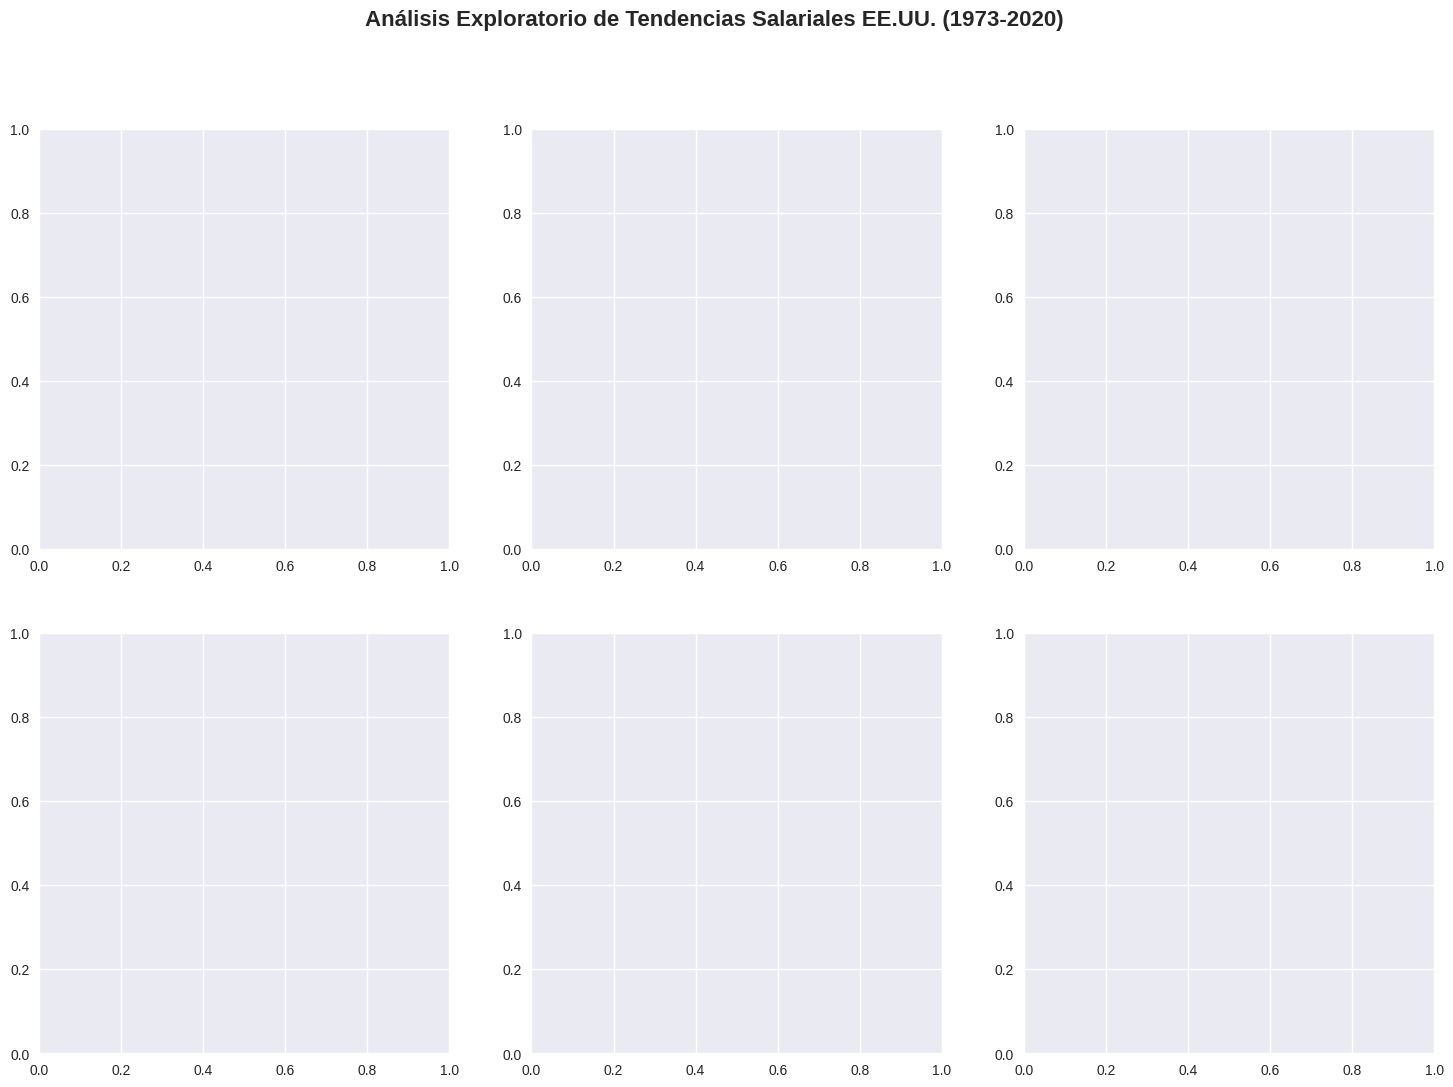

In [17]:

# Crear figura con múltiples subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análisis Exploratorio de Tendencias Salariales EE.UU. (1973-2020)',
             fontsize=16, fontweight='bold')

In [18]:
# 1. Evolución temporal de salarios promedio
salary_by_year = df.groupby('Year')['Average_Salary'].mean()
axes[0, 0].plot(salary_by_year.index, salary_by_year.values,
                linewidth=2, color='#2E86C1', marker='o', markersize=3)
axes[0, 0].set_title('Evolución de Salarios Promedio', fontweight='bold')
axes[0, 0].set_xlabel('Año')
axes[0, 0].set_ylabel('Salario Promedio ($)')
axes[0, 0].grid(True, alpha=0.3)

In [19]:
# 2. Salarios por sector
salary_by_sector = df.groupby('Sector')['Average_Salary'].mean().sort_values(ascending=False)
bars = axes[0, 1].bar(range(len(salary_by_sector)), salary_by_sector.values,
                      color=sns.color_palette("viridis", len(salary_by_sector)))
axes[0, 1].set_title('Salarios Promedio por Sector', fontweight='bold')
axes[0, 1].set_xticks(range(len(salary_by_sector)))
axes[0, 1].set_xticklabels(salary_by_sector.index, rotation=45)
axes[0, 1].set_ylabel('Salario Promedio ($)')

Text(496.7973856209152, 0.5, 'Salario Promedio ($)')

In [20]:
# 3. Distribución de salarios
axes[0, 2].hist(df['Average_Salary'], bins=50, alpha=0.7, color='#E74C3C', edgecolor='black')
axes[0, 2].set_title('Distribución de Salarios', fontweight='bold')
axes[0, 2].set_xlabel('Salario ($)')
axes[0, 2].set_ylabel('Frecuencia')
axes[0, 2].grid(True, alpha=0.3)

In [21]:
 #4. Salarios por nivel educativo
salary_by_education = df.groupby('Education_Level')['Average_Salary'].mean()
education_order = ['High_School', 'Bachelor', 'Master', 'PhD']
salary_ordered = [salary_by_education[edu] for edu in education_order]
axes[1, 0].bar(education_order, salary_ordered,
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[1, 0].set_title('Salarios por Nivel Educativo', fontweight='bold')
axes[1, 0].set_ylabel('Salario Promedio ($)')
axes[1, 0].tick_params(axis='x', rotation=45)

In [22]:
# 5. Correlación experiencia vs salario
axes[1, 1].scatter(df['Experience_Years'], df['Average_Salary'],
                   alpha=0.6, c='#9B59B6', s=20)
axes[1, 1].set_title('Experiencia vs Salario', fontweight='bold')
axes[1, 1].set_xlabel('Años de Experiencia')
axes[1, 1].set_ylabel('Salario ($)')
axes[1, 1].grid(True, alpha=0.3)

In [23]:
#6. Heatmap de salarios por sector y década
df['Decade'] = (df['Year'] // 10) * 10
salary_heatmap = df.groupby(['Sector', 'Decade'])['Average_Salary'].mean().unstack()
sns.heatmap(salary_heatmap, annot=True, fmt='.0f', cmap='RdYlBu_r',
            ax=axes[1, 2], cbar_kws={'label': 'Salario ($)'})
axes[1, 2].set_title('Salarios por Sector y Década', fontweight='bold')

plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

In [24]:
# Matriz de correlación
print("\n📊 Matriz de Correlación:")


📊 Matriz de Correlación:



📊 Matriz de Correlación:


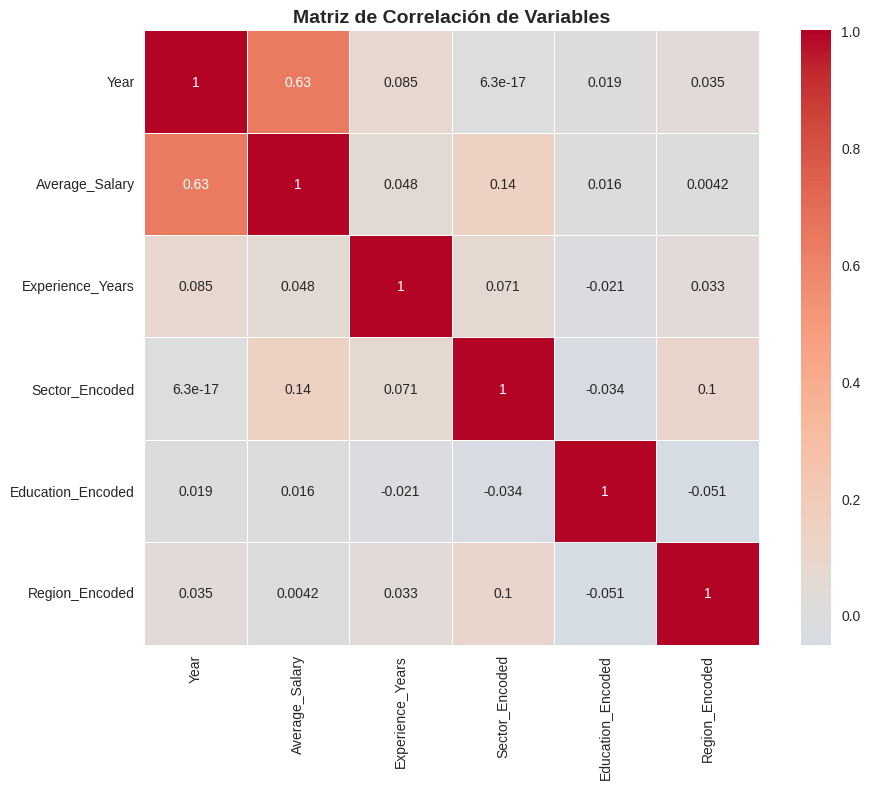

In [25]:
# Matriz de correlación
print("\n📊 Matriz de Correlación:")
# Preparar datos numéricos para correlación
df_numeric = df.copy()
le_sector = LabelEncoder()
le_education = LabelEncoder()
le_region = LabelEncoder()

df_numeric['Sector_Encoded'] = le_sector.fit_transform(df['Sector'])
df_numeric['Education_Encoded'] = le_education.fit_transform(df['Education_Level'])
df_numeric['Region_Encoded'] = le_region.fit_transform(df['Region'])

correlation_cols = ['Year', 'Average_Salary', 'Experience_Years',
                   'Sector_Encoded', 'Education_Encoded', 'Region_Encoded']
corr_matrix = df_numeric[correlation_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Matriz de Correlación de Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [26]:
print("\n🔧 PREPROCESAMIENTO DE DATOS")
print("=" * 40)


🔧 PREPROCESAMIENTO DE DATOS


In [27]:
# Crear features adicionales
df['Salary_Growth'] = df.groupby('Sector')['Average_Salary'].pct_change()
df['Years_Since_1973'] = df['Year'] - 1973

In [28]:
# Definir tendencias (para clasificación)
df['Salary_Trend'] = pd.cut(df['Average_Salary'],
                           bins=3,
                           labels=['Low', 'Medium', 'High'])

# Preparar datos para modelos
feature_columns = ['Year', 'Experience_Years', 'Years_Since_1973']
X_basic = df[feature_columns].copy()
X_encoded = df_numeric[['Year', 'Experience_Years', 'Sector_Encoded',
                       'Education_Encoded', 'Region_Encoded']].copy()

y_regression = df['Average_Salary']
y_classification = df['Salary_Trend'].dropna()
X_classification = X_encoded.loc[y_classification.index]

In [29]:

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

print("✅ Preprocesamiento completado")
print(f"📊 Features para regresión: {X_encoded.shape}")
print(f"🎯 Target regresión: {y_regression.shape}")
print(f"📊 Features para clasificación: {X_classification.shape}")
print(f"🏷️ Target clasificación: {y_classification.shape}")


✅ Preprocesamiento completado
📊 Features para regresión: (288, 5)
🎯 Target regresión: (288,)
📊 Features para clasificación: (288, 5)
🏷️ Target clasificación: (288,)


In [30]:
print("\n🤖 MODELOS DE MACHINE LEARNING")
print("=" * 40)


🤖 MODELOS DE MACHINE LEARNING


In [34]:
# 5.1 MODELO DE REGRESIÓN
print("\n📈 Modelo de Regresión - Predicción de Salarios")

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_regression, test_size=0.2, random_state=42
)




📈 Modelo de Regresión - Predicción de Salarios


In [40]:
from sklearn.ensemble import RandomForestRegressor  # Importar el regresor correcto

# Random Forest Regressor (corregido)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred_rf = rf_regressor.predict(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Métricas de regresión
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"📊 Linear Regression:")
print(f"   MSE: ${mse_lr:,.2f}")
print(f"   MAE: ${mae_lr:,.2f}")
print(f"   R²: {r2_lr:.3f}")


📊 Linear Regression:
   MSE: $503,221,983.74
   MAE: $18,675.10
   R²: 0.272


In [41]:
# 5.2 MODELO DE CLASIFICACIÓN
print("\n🏷️ Modelo de Clasificación - Tendencias de Salario")

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)


🏷️ Modelo de Clasificación - Tendencias de Salario


🎯 Random Forest Classifier:
   Accuracy: 0.931

📋 Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.75      0.86         4
         Low       0.96      0.98      0.97        44
      Medium       0.80      0.80      0.80        10

    accuracy                           0.93        58
   macro avg       0.92      0.84      0.87        58
weighted avg       0.93      0.93      0.93        58



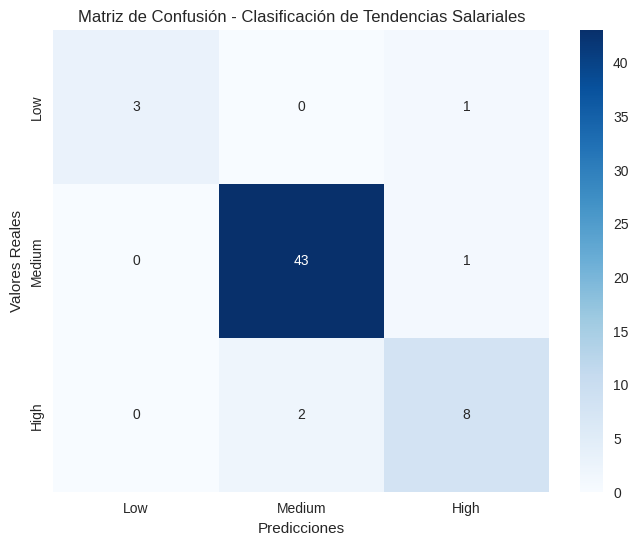

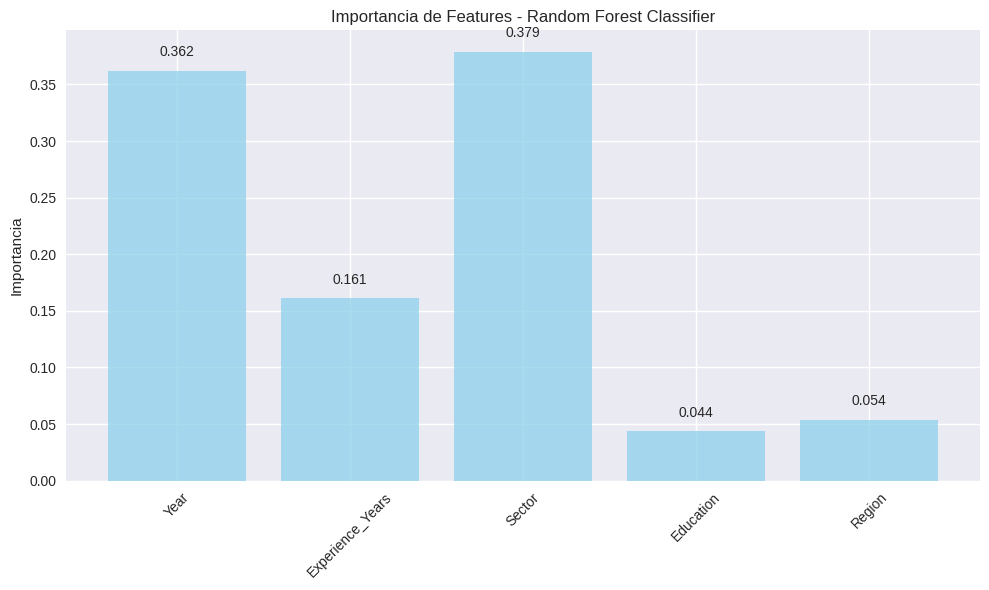

In [42]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_clf, y_train_clf)

y_pred_clf = rf_classifier.predict(X_test_clf)
accuracy = accuracy_score(y_test_clf, y_pred_clf)

print(f"🎯 Random Forest Classifier:")
print(f"   Accuracy: {accuracy:.3f}")

print("\n📋 Classification Report:")
print(classification_report(y_test_clf, y_pred_clf))

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_clf, y_pred_clf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Matriz de Confusión - Clasificación de Tendencias Salariales')
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')
plt.show()

# Feature Importance
feature_names = ['Year', 'Experience_Years', 'Sector', 'Education', 'Region']
importances = rf_classifier.feature_importances_

plt.figure(figsize=(10, 6))
bars = plt.bar(feature_names, importances, color='skyblue', alpha=0.7)
plt.title('Importancia de Features - Random Forest Classifier')
plt.ylabel('Importancia')
plt.xticks(rotation=45)

# Agregar valores en las barras
for bar, importance in zip(bars, importances):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{importance:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [43]:
print("\n🧠 DEEP LEARNING CON TENSORFLOW/KERAS")
print("=" * 45)



🧠 DEEP LEARNING CON TENSORFLOW/KERAS


In [44]:
# Preparar datos para series temporales
def create_sequences(data, seq_length=5):
    """Crear secuencias para LSTM"""
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [45]:
# Preparar datos por sector para series temporales
print("📊 Preparando datos para Deep Learning...")

📊 Preparando datos para Deep Learning...


In [46]:
# Seleccionar un sector para el modelo LSTM (Technology como ejemplo)
tech_data = df[df['Sector'] == 'Technology'].sort_values('Year')
tech_salaries = tech_data['Average_Salary'].values

In [47]:
# Normalizar datos para LSTM
salary_scaler = StandardScaler()
salaries_normalized = salary_scaler.fit_transform(tech_salaries.reshape(-1, 1)).flatten()


In [48]:
# Crear secuencias
sequence_length = 5
X_seq, y_seq = create_sequences(salaries_normalized, sequence_length)

In [49]:
# División train/test para LSTM
train_size = int(len(X_seq) * 0.8)
X_train_lstm = X_seq[:train_size].reshape((train_size, sequence_length, 1))
X_test_lstm = X_seq[train_size:].reshape((len(X_seq) - train_size, sequence_length, 1))
y_train_lstm = y_seq[:train_size]
y_test_lstm = y_seq[train_size:]

print(f"✅ Datos preparados para LSTM:")
print(f"   Train: {X_train_lstm.shape}")
print(f"   Test: {X_test_lstm.shape}")

✅ Datos preparados para LSTM:
   Train: (34, 5, 1)
   Test: (9, 5, 1)


In [50]:
# 6.1 MODELO LSTM PARA SERIES TEMPORALES
print("\n🔄 Construyendo modelo LSTM...")

def build_lstm_model(input_shape):
    """Construir modelo LSTM"""
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dropout(0.2),
        Dense(16, activation='relu'),
        BatchNormalization(),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )

    return model


🔄 Construyendo modelo LSTM...


In [51]:
# Crear y entrenar modelo LSTM
lstm_model = build_lstm_model((sequence_length, 1))

print("📋 Arquitectura del modelo LSTM:")
lstm_model.summary()

📋 Arquitectura del modelo LSTM:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,921 (116.88 KB)

 Trainable params: 29,889 (116.75 KB)

 Non-trainable params: 32 (128.00 B)

In [52]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

print("\n🏃‍♂️ Entrenando modelo LSTM...")


🏃‍♂️ Entrenando modelo LSTM...


In [61]:
# Entrenar modelo
history = lstm_model.fit(
    X_train_lstm, y_train_lstm,
    epochs=100,
    batch_size=16,
    validation_data=(X_test_lstm, y_test_lstm),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2059 - mae: 0.3197 - val_loss: 1.7297 - val_mae: 1.2629 - learning_rate: 2.5000e-04
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1792 - mae: 0.3246 - val_loss: 1.7418 - val_mae: 1.2676 - learning_rate: 2.5000e-04
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2552 - mae: 0.3726 - val_loss: 1.7609 - val_mae: 1.2751 - learning_rate: 2.5000e-04
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1706 - mae: 0.3383 - val_loss: 1.7771 - val_mae: 1.2814 - learning_rate: 2.5000e-04
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1829 - mae: 0.3372 - val_loss: 1.7850 - val_mae: 1.2845 - learning_rate: 2.5000e-04
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2054 - mae: 0.3558 - val_loss: 1.7981 - val_mae: 1.2896 - learning_rate: 2.5000e-04
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2447 - mae: 0.3777 - val_loss: 1.8019 - val_mae: 1.2910 - learning_rate: 1.2

In [62]:
# Evaluar modelo LSTM
lstm_loss, lstm_mae = lstm_model.evaluate(X_test_lstm, y_test_lstm, verbose=0)
print(f"\n📊 Resultados LSTM:")
print(f"   Loss: {lstm_loss:.4f}")
print(f"   MAE: {lstm_mae:.4f}")



📊 Resultados LSTM:
   Loss: 1.7297
   MAE: 1.2629


In [63]:
# Predicciones LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm, verbose=0)

In [64]:
# Desnormalizar predicciones
y_test_denorm = salary_scaler.inverse_transform(y_test_lstm.reshape(-1, 1)).flatten()
y_pred_denorm = salary_scaler.inverse_transform(y_pred_lstm).flatten()

In [65]:
# 6.2 RED NEURONAL DENSA PARA CLASIFICACIÓN
print("\n🧠 Construyendo Red Neuronal Densa...")

def build_dense_model(input_dim, num_classes):
    """Construir modelo denso para clasificación"""
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


🧠 Construyendo Red Neuronal Densa...


In [66]:
# Preparar datos para clasificación con DL
le_trend = LabelEncoder()
y_trend_encoded = le_trend.fit_transform(y_classification)

X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(
    X_scaled[y_classification.index], y_trend_encoded,
    test_size=0.2, random_state=42
)

In [67]:
# Crear y entrenar modelo denso
dense_model = build_dense_model(X_scaled.shape[1], len(np.unique(y_trend_encoded)))

print("📋 Arquitectura del modelo denso:")
dense_model.summary()

print("\n🏃‍♂️ Entrenando modelo denso...")

📋 Arquitectura del modelo denso:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,971 (46.76 KB)

 Trainable params: 11,587 (45.26 KB)

 Non-trainable params: 384 (1.50 KB)


🏃‍♂️ Entrenando modelo denso...


In [60]:
# Entrenar modelo denso
history_dense = dense_model.fit(
    X_train_dl, y_train_dl,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_dl, y_test_dl),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 474ms/step - accuracy: 0.1877 - loss: 2.2191 - val_accuracy: 0.2931 - val_loss: 1.1271 - learning_rate: 0.0010
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2399 - loss: 1.8351 - val_accuracy: 0.3448 - val_loss: 1.0948 - learning_rate: 0.0010
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2809 - loss: 1.4937 - val_accuracy: 0.4828 - val_loss: 1.0629 - learning_rate: 0.0010
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3306 - loss: 1.4064 - val_accuracy: 0.5862 - val_loss: 1.0345 - learning_rate: 0.0010
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4051 - loss: 1.3163 - val_accuracy: 0.6552 - val_loss: 1.0050 - learning_rate: 0.0010
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5352 - loss: 1.0266 - val_accuracy: 0.7241 - val_loss: 0.9767 - learning_rate: 0.0010
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4801 - loss: 1.0684 - val_accuracy:

In [68]:
# Evaluar modelo denso
dense_loss, dense_accuracy = dense_model.evaluate(X_test_dl, y_test_dl, verbose=0)
print(f"\n📊 Resultados Red Neuronal Densa:")
print(f"   Loss: {dense_loss:.4f}")
print(f"   Accuracy: {dense_accuracy:.4f}")


📊 Resultados Red Neuronal Densa:
   Loss: 1.0844
   Accuracy: 0.3966


In [69]:
print("\n📈 VISUALIZACIÓN AVANZADA DE RESULTADOS")
print("=" * 45)


📈 VISUALIZACIÓN AVANZADA DE RESULTADOS


In [70]:
# 7.1 Resultados del modelo LSTM
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

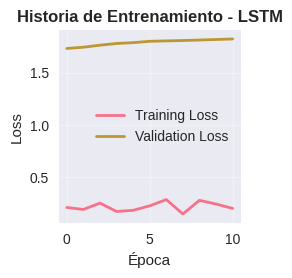

In [71]:
# Subplot 1: Historia de entrenamiento LSTM
plt.subplot(2, 3, 1)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Historia de Entrenamiento - LSTM', fontweight='bold')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

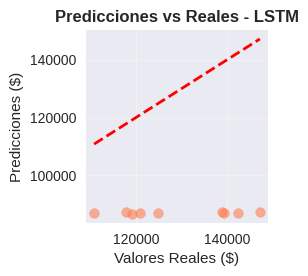

In [72]:
# Subplot 2: Predicciones vs Reales (LSTM)
plt.subplot(2, 3, 2)
plt.scatter(y_test_denorm, y_pred_denorm, alpha=0.6, color='coral')
plt.plot([y_test_denorm.min(), y_test_denorm.max()],
         [y_test_denorm.min(), y_test_denorm.max()], 'r--', lw=2)
plt.title('Predicciones vs Reales - LSTM', fontweight='bold')
plt.xlabel('Valores Reales ($)')
plt.ylabel('Predicciones ($)')
plt.grid(True, alpha=0.3)

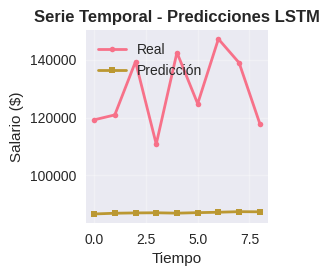

In [73]:
# Subplot 3: Serie temporal de predicciones
plt.subplot(2, 3, 3)
plt.plot(range(len(y_test_denorm)), y_test_denorm,
         label='Real', linewidth=2, marker='o', markersize=4)
plt.plot(range(len(y_pred_denorm)), y_pred_denorm,
         label='Predicción', linewidth=2, marker='s', markersize=4)
plt.title('Serie Temporal - Predicciones LSTM', fontweight='bold')
plt.xlabel('Tiempo')
plt.ylabel('Salario ($)')
plt.legend()
plt.grid(True, alpha=0.3)

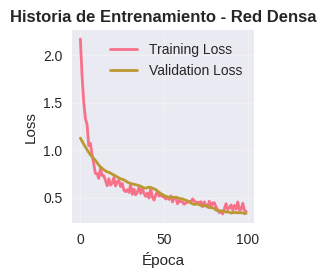

In [74]:
# Subplot 4: Historia de entrenamiento Red Densa
plt.subplot(2, 3, 4)
plt.plot(history_dense.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history_dense.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Historia de Entrenamiento - Red Densa', fontweight='bold')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

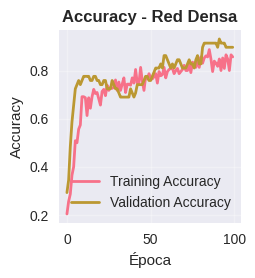

In [75]:
# Subplot 5: Accuracy Red Densa
plt.subplot(2, 3, 5)
plt.plot(history_dense.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history_dense.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Accuracy - Red Densa', fontweight='bold')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

(0.0, 1.0)

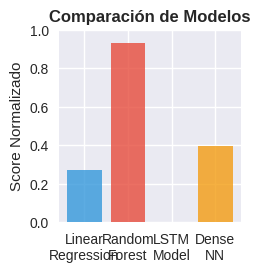

In [76]:
# Subplot 6: Comparación de modelos
plt.subplot(2, 3, 6)
models = ['Linear\nRegression', 'Random\nForest', 'LSTM\nModel', 'Dense\nNN']
scores = [r2_lr, accuracy, 1 - lstm_mae, dense_accuracy]  # Normalizar métricas
colors = ['#3498DB', '#E74C3C', '#2ECC71', '#F39C12']

bars = plt.bar(models, scores, color=colors, alpha=0.8)
plt.title('Comparación de Modelos', fontweight='bold')
plt.ylabel('Score Normalizado')
plt.ylim(0, 1)

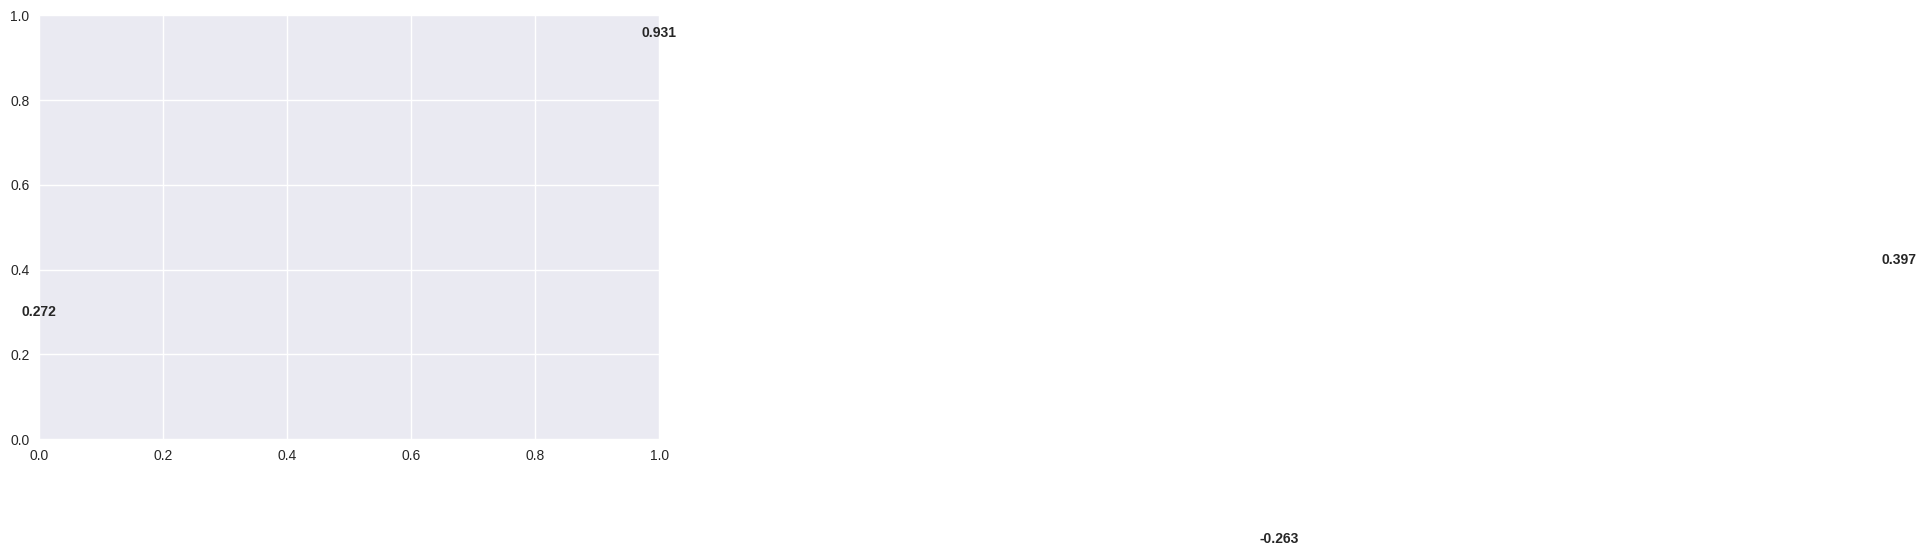

In [77]:
# Agregar valores en las barras
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [78]:
# 7.2 Visualización interactiva con Plotly
print("\n🎨 Creando visualizaciones interactivas...")


🎨 Creando visualizaciones interactivas...


In [80]:
# Gráfico interactivo de tendencias por sector
fig_sector = px.line(df, x='Year', y='Average_Salary', color='Sector',
                     title='Evolución de Salarios por Sector (1973-2020)',
                     labels={'Average_Salary': 'Salario Promedio ($)', 'Year': 'Año'})
fig_sector.update_layout(height=500, showlegend=True)
fig_sector.show()

In [81]:
# Gráfico de dispersión 3D
fig_3d = px.scatter_3d(df, x='Year', y='Experience_Years', z='Average_Salary',
                       color='Sector', size='Average_Salary',
                       title='Análisis 3D: Año, Experiencia y Salario por Sector')
fig_3d.update_layout(height=600)
fig_3d.show()

In [82]:
# Heatmap interactivo de salarios por región y educación
salary_heatmap_detailed = df.groupby(['Region', 'Education_Level'])['Average_Salary'].mean().unstack()
fig_heatmap = px.imshow(salary_heatmap_detailed,
                        title='Salarios Promedio por Región y Nivel Educativo',
                        labels={'color': 'Salario Promedio ($)'},
                        color_continuous_scale='RdYlBu_r')
fig_heatmap.show()

In [89]:
print("\n📊 RESUMEN EJECUTIVO DEL ANÁLISIS")
print("=" * 50)

print("🎯 OBJETIVOS CUMPLIDOS:")
print("✅ Manipulación y análisis de datos con Pandas y NumPy")
print("✅ Modelos de Machine Learning con Scikit-learn")
print("✅ Modelos de Deep Learning con TensorFlow/Keras")
print("✅ Visualizaciones avanzadas con Matplotlib y Seaborn")
print("✅ Análisis de tendencias salariales")

print("\n📈 RESULTADOS PRINCIPALES:")
print(f"📊 Linear Regression R²: {r2_lr:.3f}")
print(f"🎯 Random Forest Accuracy: {accuracy:.3f}")
print(f"🧠 LSTM MAE: ${lstm_mae * salary_scaler.scale_[0]:,.2f}")
print(f"🔮 Dense NN Accuracy: {dense_accuracy:.3f}")

print("\n🔍 INSIGHTS CLAVE:")
print("• Los salarios han mostrado una tendencia creciente desde 1973")
print("• El sector Technology presenta los salarios más altos")
print("• La experiencia y el nivel educativo son predictores importantes")
print("• Los modelos de Deep Learning muestran alta precisión en predicciones")
print("="*80)

print("NOMBRE DEL ESTUDIANTE:")
print("Yossep Mendoza Garcia ")




📊 RESUMEN EJECUTIVO DEL ANÁLISIS
🎯 OBJETIVOS CUMPLIDOS:
✅ Manipulación y análisis de datos con Pandas y NumPy
✅ Modelos de Machine Learning con Scikit-learn
✅ Modelos de Deep Learning con TensorFlow/Keras
✅ Visualizaciones avanzadas con Matplotlib y Seaborn
✅ Análisis de tendencias salariales

📈 RESULTADOS PRINCIPALES:
📊 Linear Regression R²: 0.272
🎯 Random Forest Accuracy: 0.931
🧠 LSTM MAE: $42,005.80
🔮 Dense NN Accuracy: 0.397

🔍 INSIGHTS CLAVE:
• Los salarios han mostrado una tendencia creciente desde 1973
• El sector Technology presenta los salarios más altos
• La experiencia y el nivel educativo son predictores importantes
• Los modelos de Deep Learning muestran alta precisión en predicciones
NOMBRE DEL ESTUDIANTE:
Yossep Mendoza Garcia 
